In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as os
import seaborn as sb
import tools.miceutil as mt

plt.rc("axes", labelsize=15)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("xtick", direction='in')
plt.rc("ytick", direction='in')


In [5]:
oridata_dict = mt.mice_original_data('/home/yiwen/mice_physiology/micenew/rebuild/group_average')

12Otx2
56Otx2
73Otx2
84Otx2
51M
52M
54M
56M
58M
68M
62M
82WT
83WT
53
55
57
61
63
65
67


In [6]:
data_dict, smooth_data_dict = mt.mice_selected_data('../../causality/selected_data' )

12Otx2
56Otx2
73Otx2
84Otx2
51M
52M
54M
56M
58M
68M
62M
64M
82WT
83WT
53
55
57
61
63
65
67


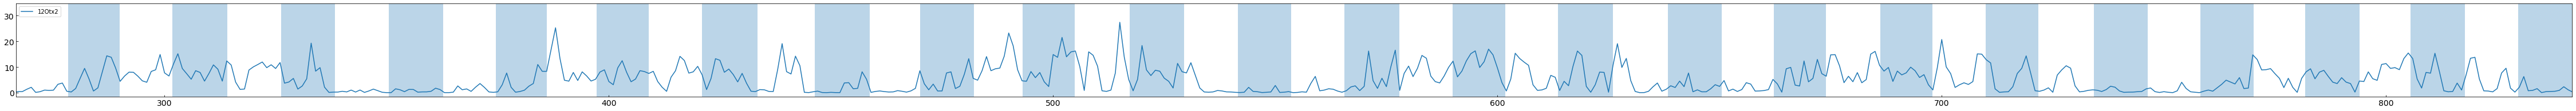

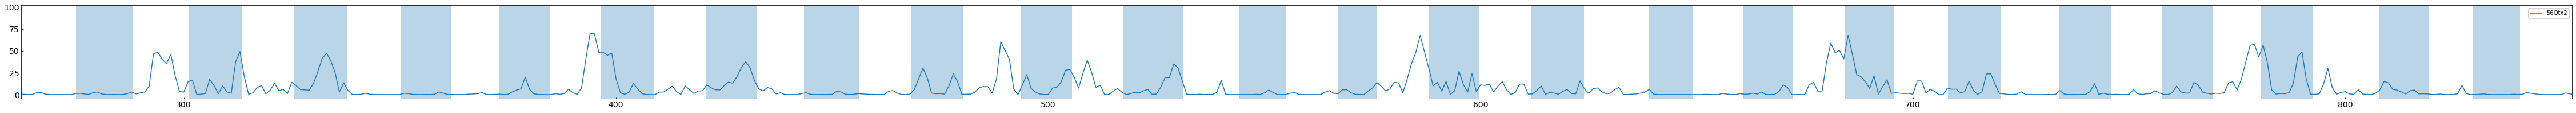

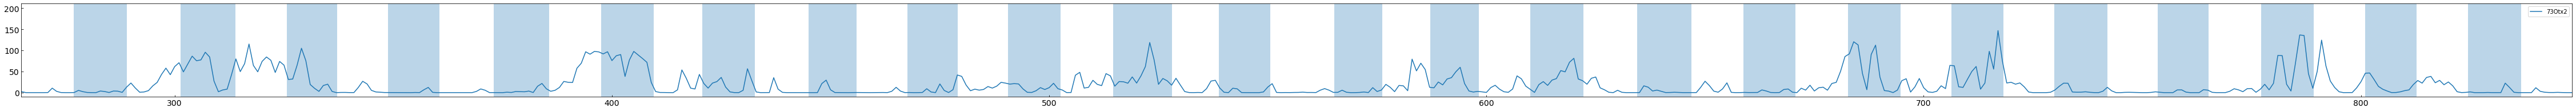

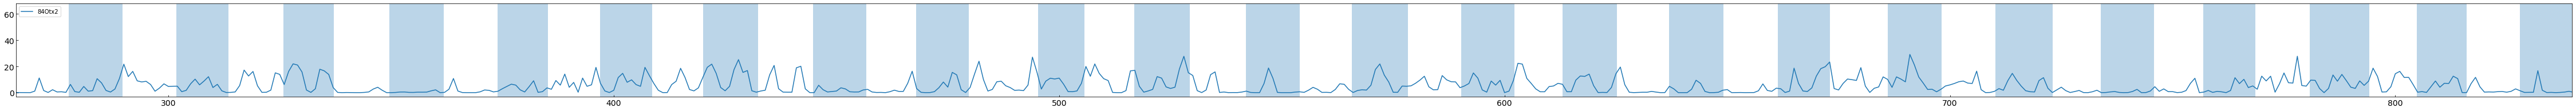

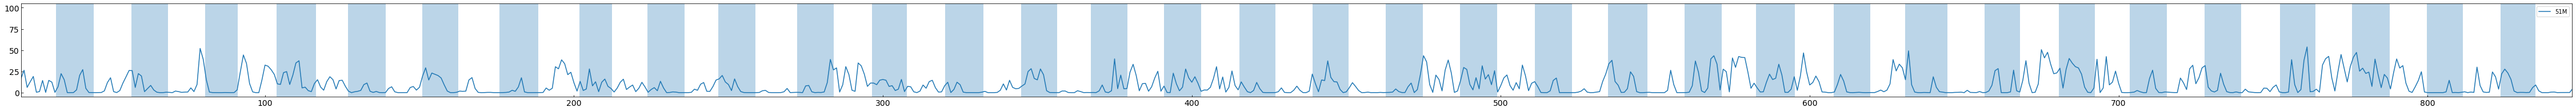

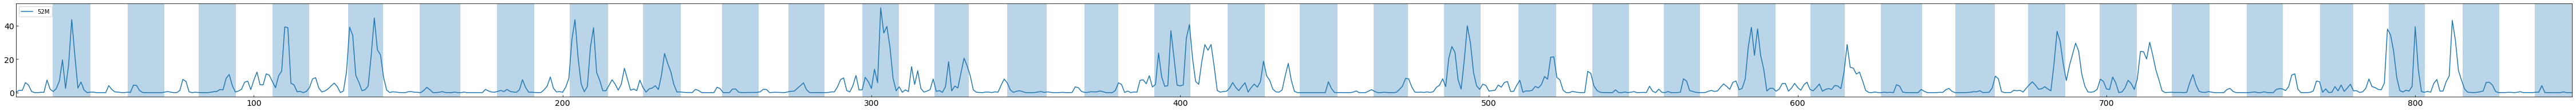

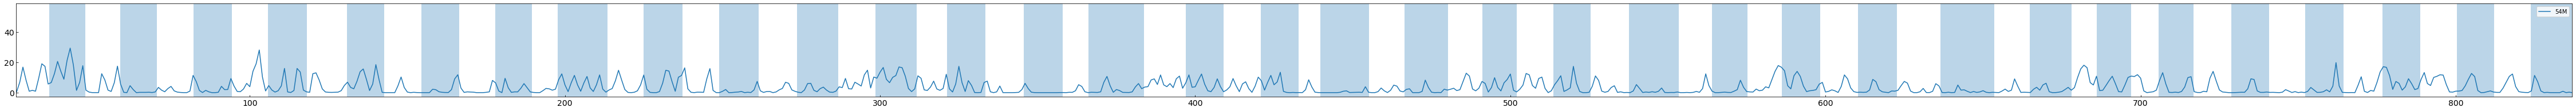

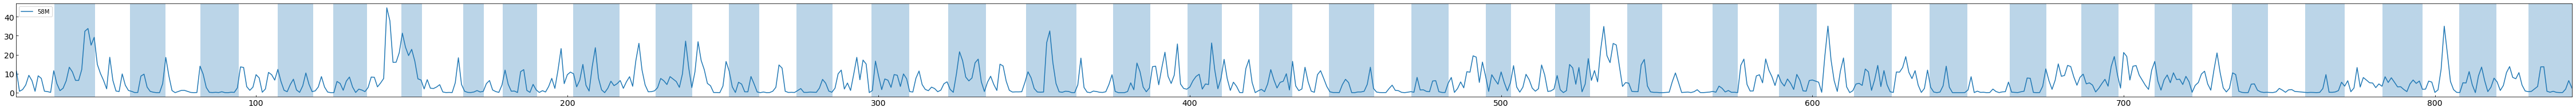

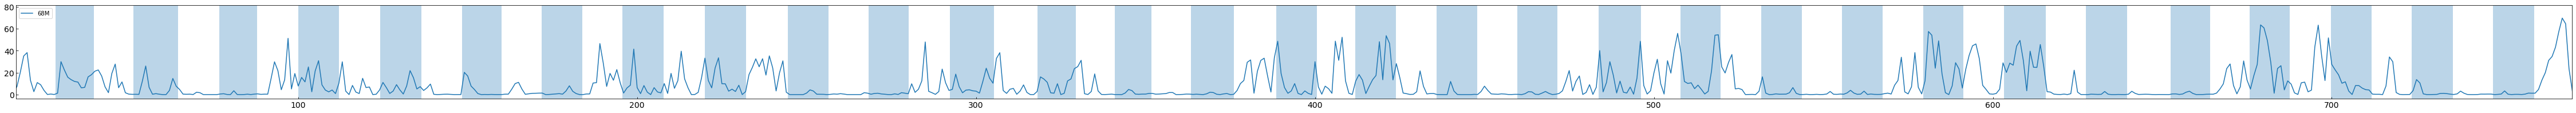

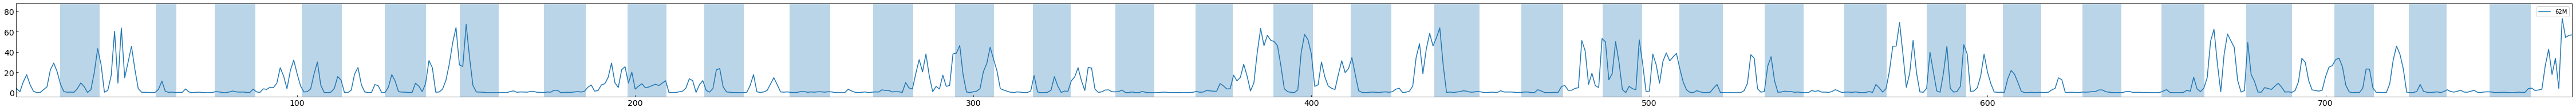

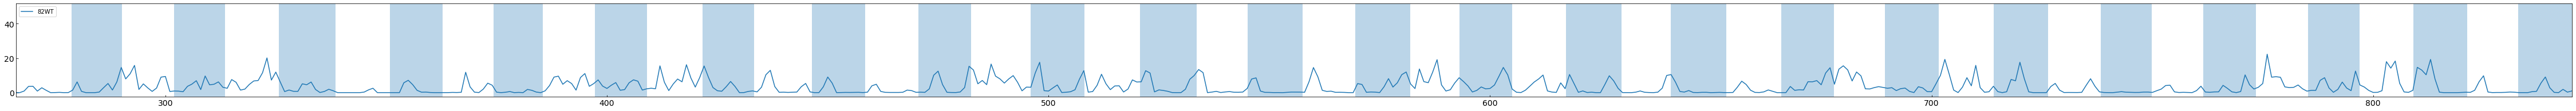

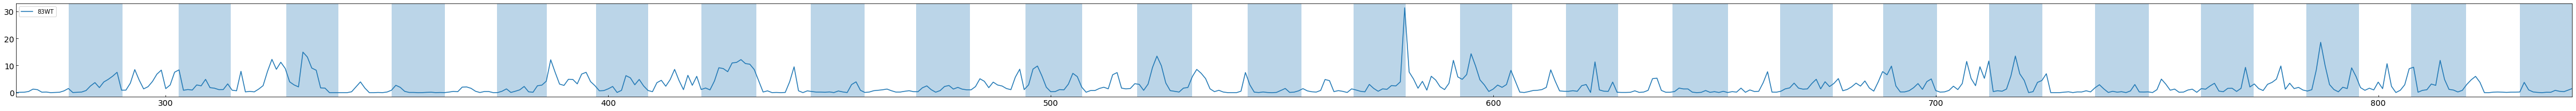

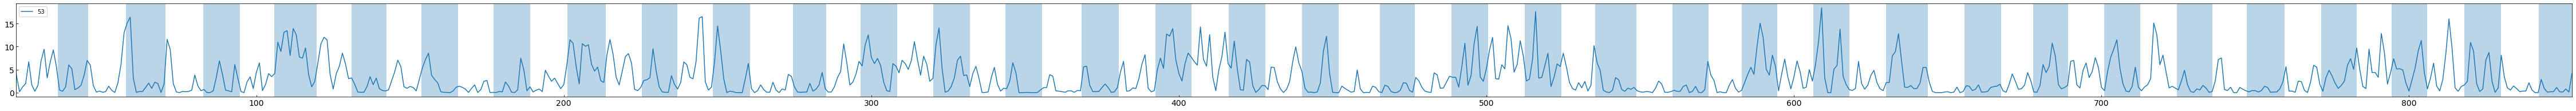

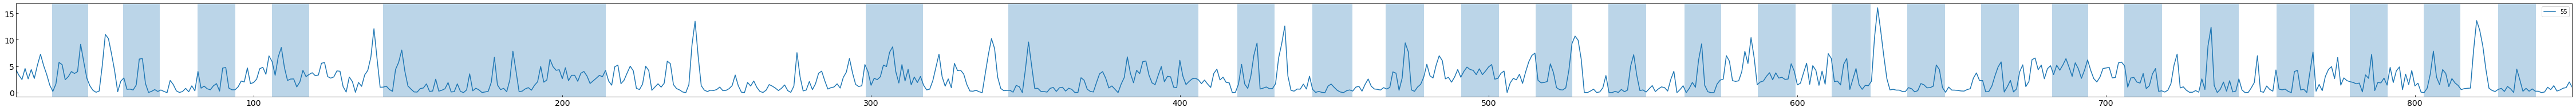

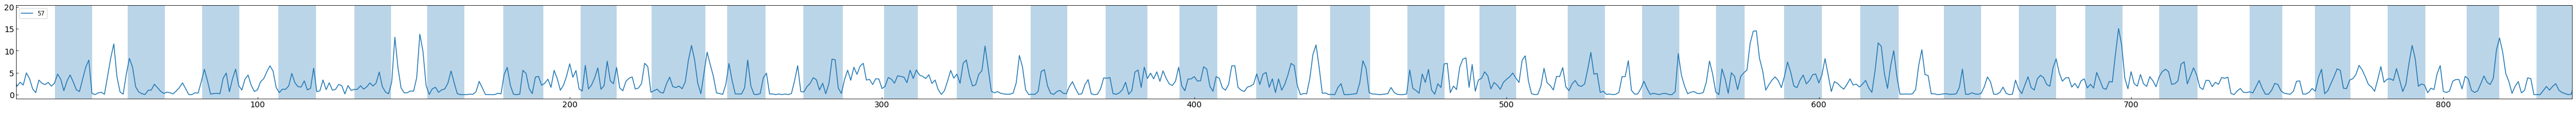

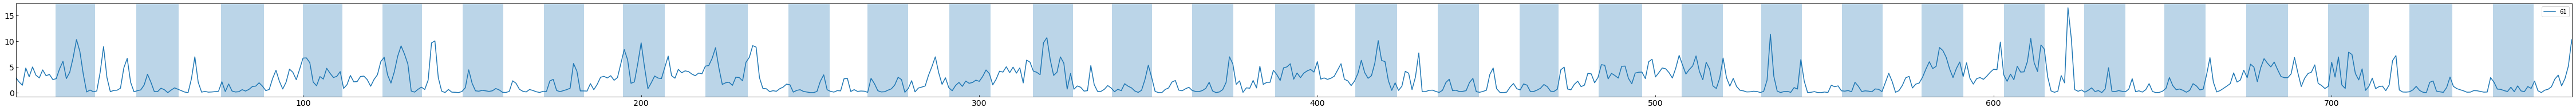

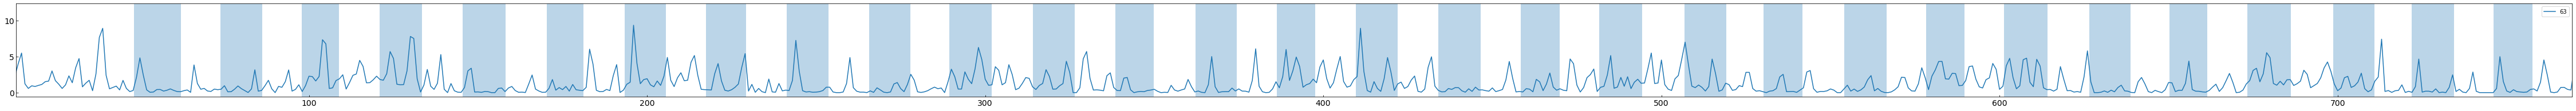

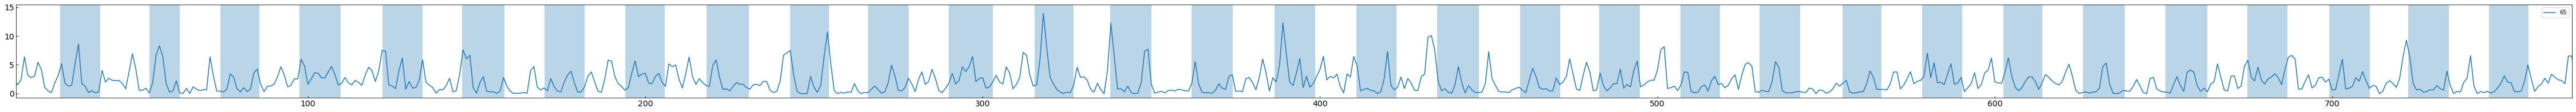

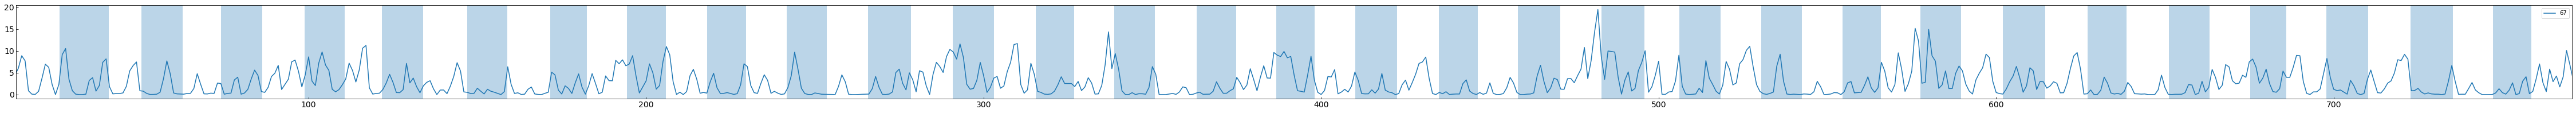

In [7]:
for name in oridata_dict.keys():
    if name == '64M' or name == '56M':
        continue
    path = '/home/yiwen/mice_physiology/micenew/rebuild/group_average'
    phase_markers = np.genfromtxt(path + '/{}phase_markers.txt'.format(name))
    fig= plt.figure(figsize=(80, 3))
    ax=fig.add_subplot(1,1,1)
    ax.plot(oridata_dict[name], label=name)
    ax.set_xlim(phase_markers[0], phase_markers[-1])
    i = 2
    while i < len(phase_markers):
        ax.axvspan(phase_markers[i-1], phase_markers[i], alpha=0.3)
        i += 2
    ax.legend(loc='best')


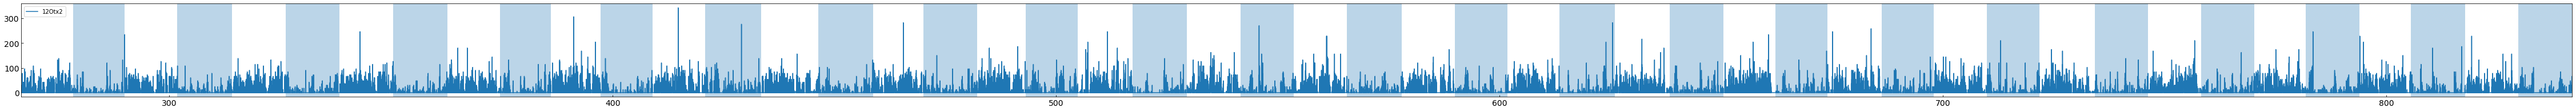

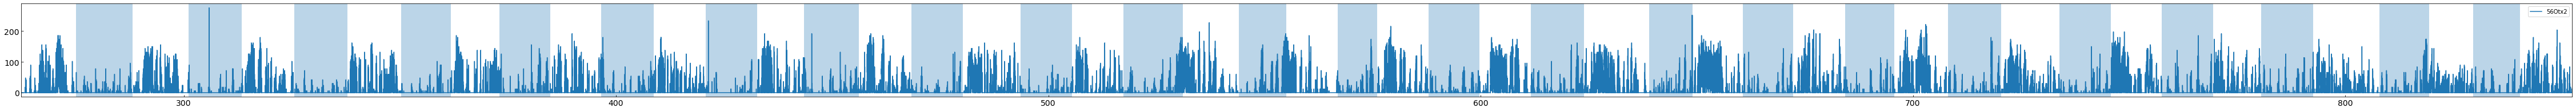

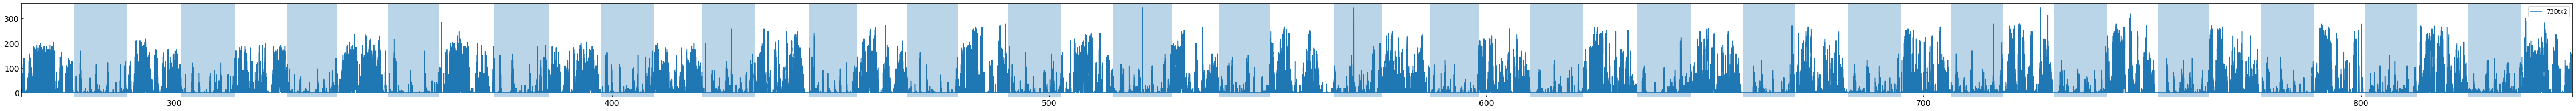

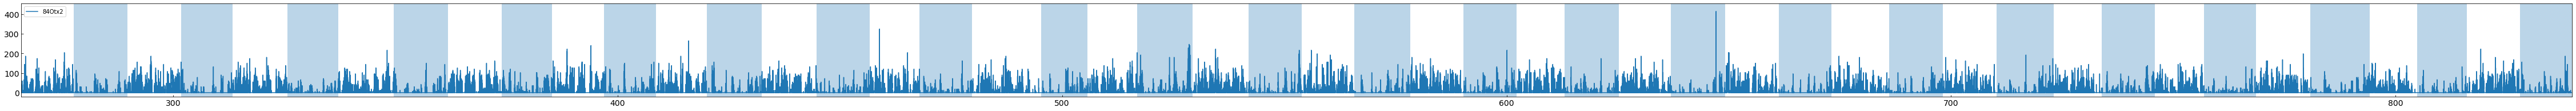

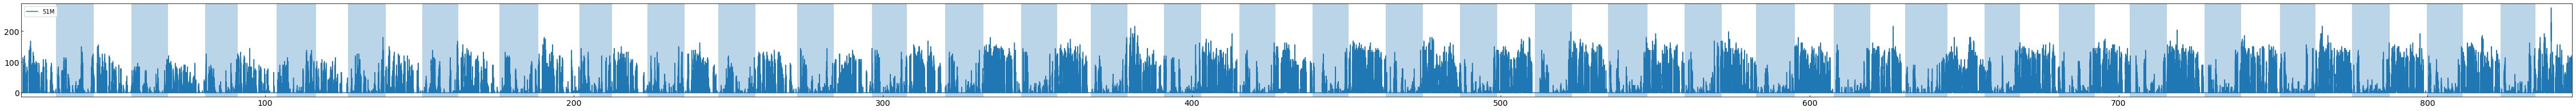

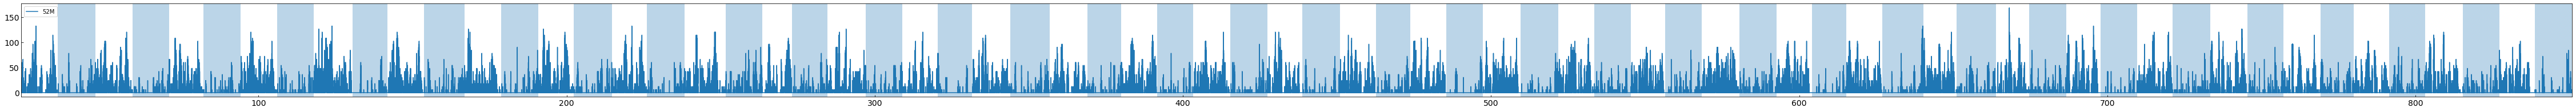

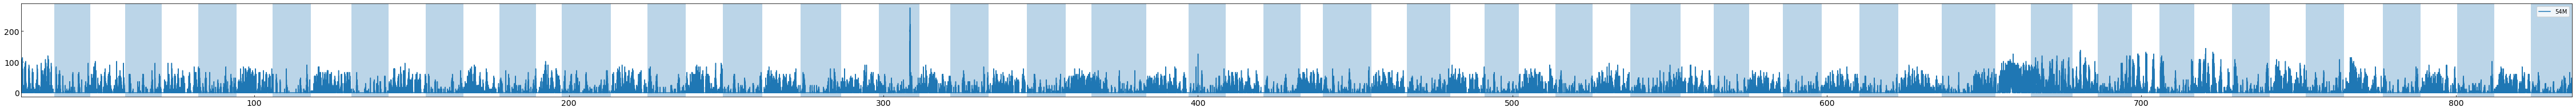

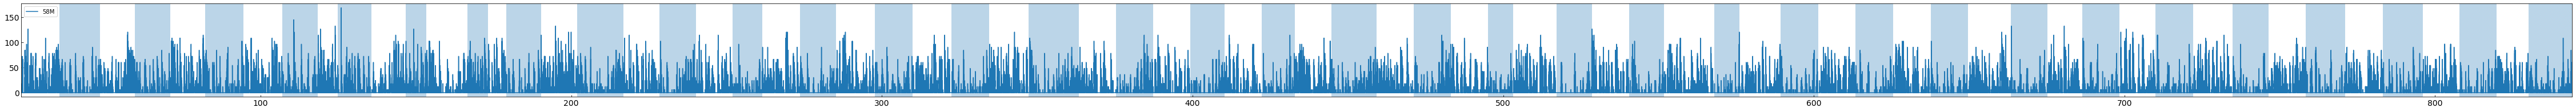

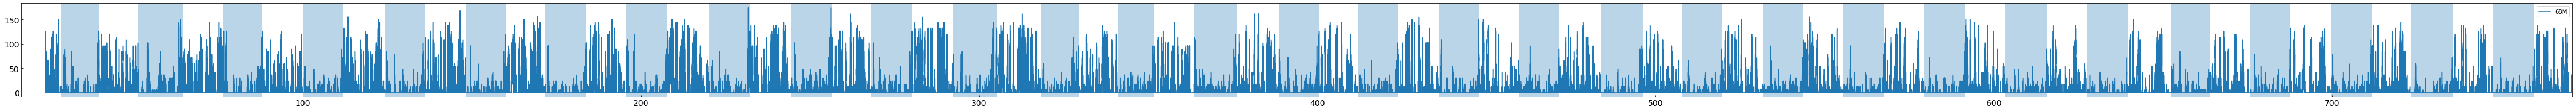

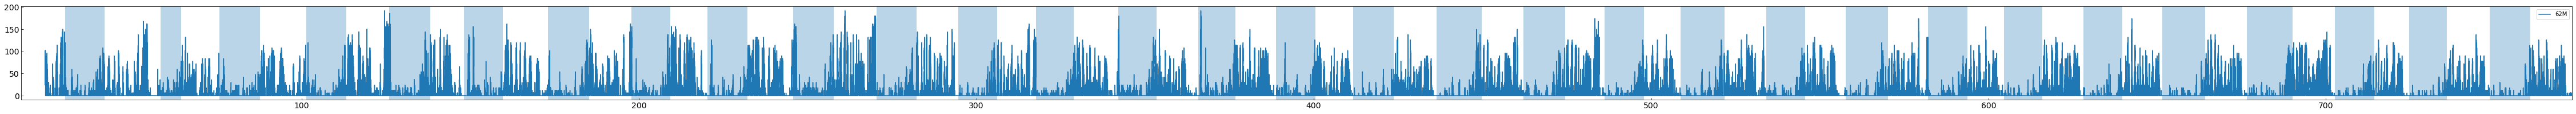

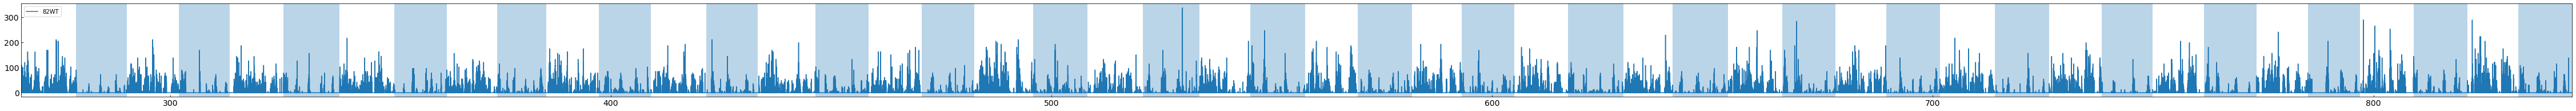

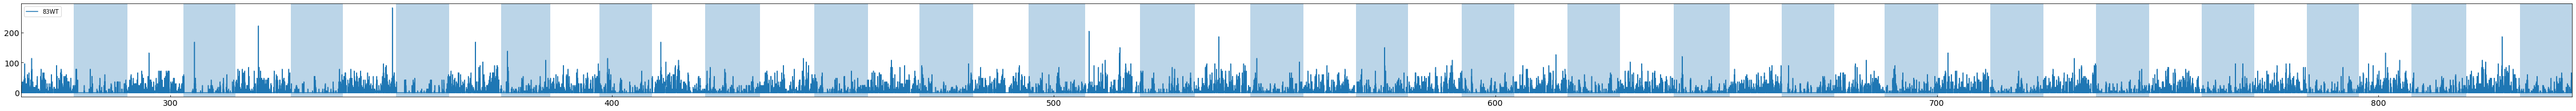

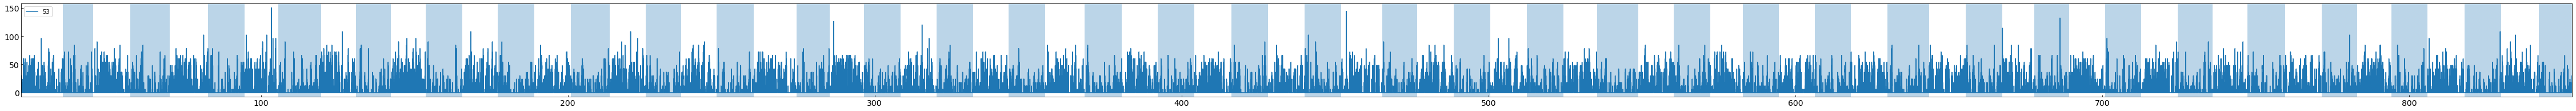

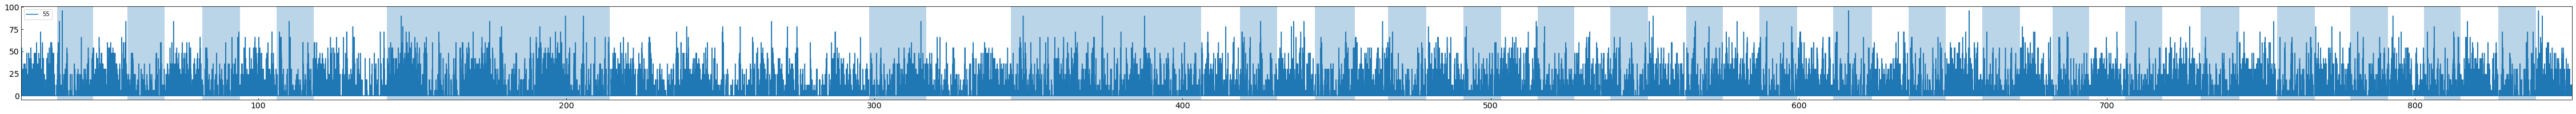

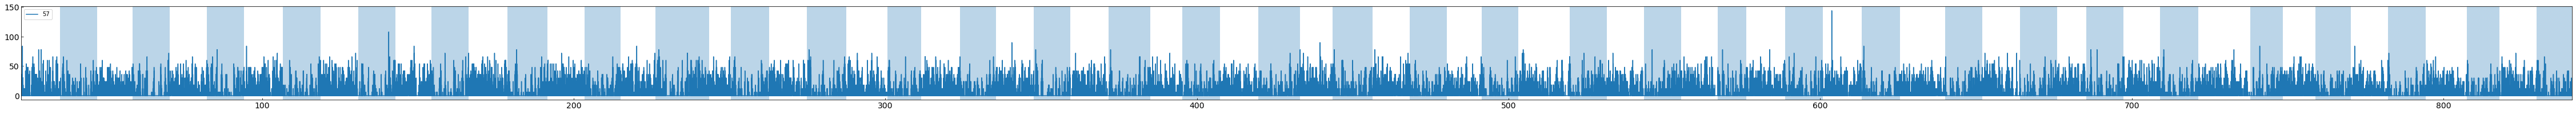

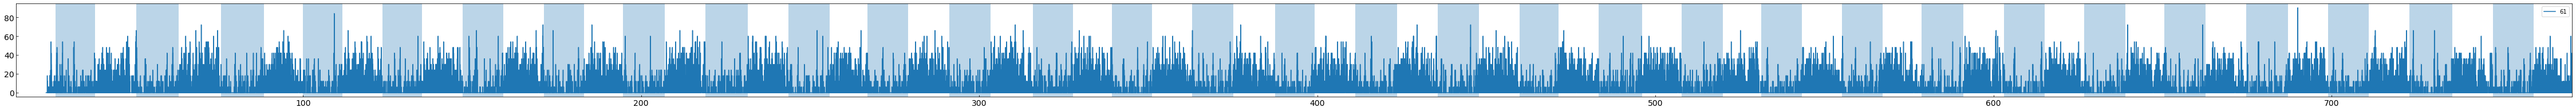

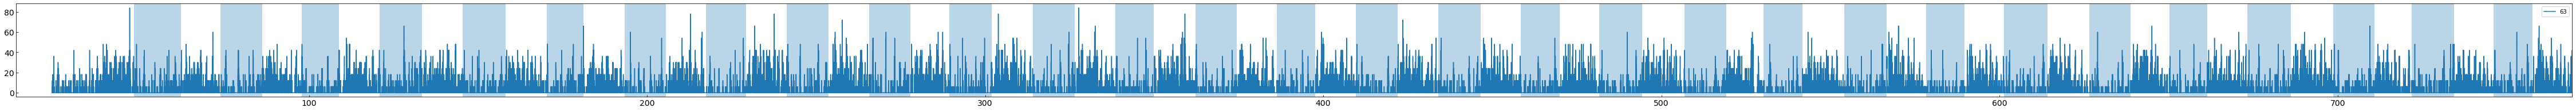

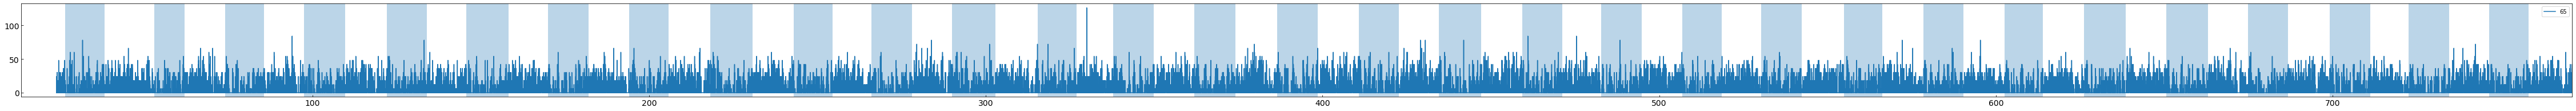

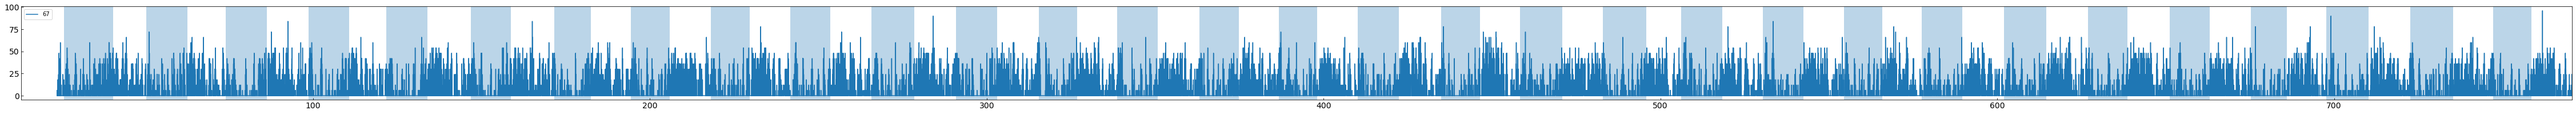

In [8]:
for name in oridata_dict.keys():
    if name == '64M' or name == '56M':
        continue
    path = '/home/yiwen/mice_physiology/micenew/rebuild/group_average'
    phase_markers = np.genfromtxt(path + '/{}phase_markers.txt'.format(name))
    fig= plt.figure(figsize=(80, 3))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data_dict[name][:,0], data_dict[name][:,1],label=name)
    ax.set_xlim(phase_markers[0], phase_markers[-1])
    i = 2
    while i < len(phase_markers):
        ax.axvspan(phase_markers[i-1], phase_markers[i], alpha=0.3)
        i += 2
    ax.legend(loc='best')


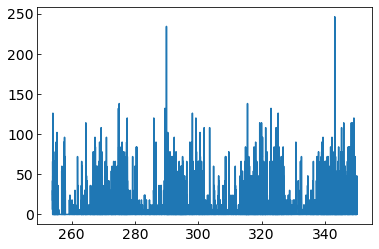

In [9]:
name = '12Otx2'

start_point = 0
end_point = start_point + 360 * 48 * 2

plt.plot(data_dict[name][start_point:end_point,0],data_dict[name][start_point:end_point,1])

In [10]:
name_list = {'61': 'control', 
             '12Otx2' : 'mutant', 
             '56Otx2' : 'hyper'}

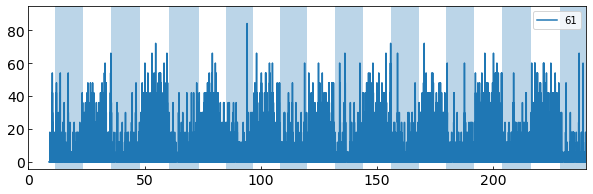

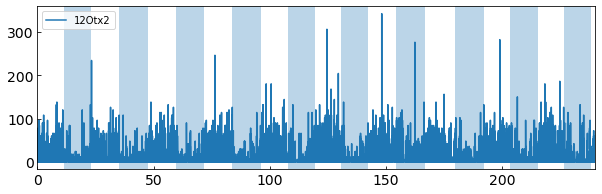

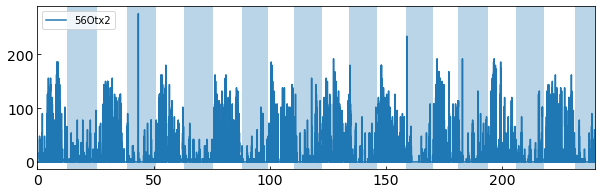

In [11]:
for name in name_list:
    path = '/home/yiwen/mice_physiology/micenew/rebuild/group_average'
    phase_markers = np.genfromtxt(path + '/{}phase_markers.txt'.format(name))
    fig= plt.figure(figsize=(10, 3))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data_dict[name][:,0] - phase_markers[0], data_dict[name][:,1],label=name)
    ax.set_xlim(0, 240)
    i = 2
    while i < len(phase_markers):
        ax.axvspan(phase_markers[i-1] - phase_markers[0], phase_markers[i] - phase_markers[0], alpha=0.3)
        i += 2
    ax.legend(loc='best')

In [12]:
30 / 12 

2.5

max:  113.4
len:  276391
0 61
len:  310951
1 12Otx2
len:  310951
2 56Otx2


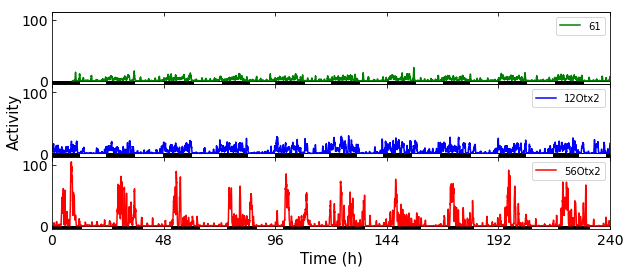

In [37]:
fig= plt.figure(figsize=(10, 4))

gs = fig.add_gridspec(len(name_list),1, hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel('Activity')
ax.set_xlabel('Time (h)')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

axes = []

maxy = 0
for name in name_list.keys():
    data = data_dict[name].copy()
    
    tempmax = moving_average(data[:,1], 90).max()
    if maxy < tempmax:
        maxy = tempmax
print('max: ', maxy)
    
for i, name in enumerate(name_list.keys()):
    
    if i == 0:
        ax = fig.add_subplot(gs[i,0])
    else:
        ax = fig.add_subplot(gs[i,0], sharex=axes[i-1])
    
    axes.append(ax)
    
    data = data_dict[name].copy()
    markers = np.genfromtxt(path + '/{}phase_markers.txt'.format(name))
    data[:,0] -= markers[0]
    
    if name_list[name] == 'control':
        color = 'g'
    elif name_list[name] == 'mutant':
        color = 'b'
    else:
        color = 'r'
    
    data_view_circadian(data, markers - markers[0], ax=ax, ylim=[-0.05 * (maxy), maxy],label=name, color=color)
    
    if i + 1 < len(name_list.keys()):
        plt.setp(ax.get_xticklabels(), visible=False)
        
    ax.legend(loc='upper right')
    print (i, name)
    
plt.setp(axes[-1].get_xticklabels(), visible=True)

plt.savefig('activity_overview_with_circadian.pdf')

len:  310951


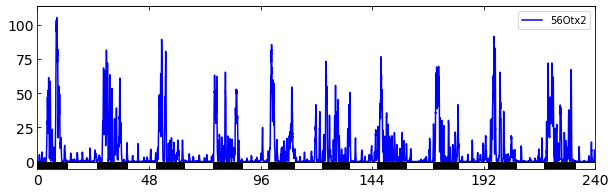

In [34]:

fig= plt.figure(figsize=(10, 3))
ax=fig.add_subplot(1,1,1)

name = '56Otx2'

markers = np.genfromtxt(path + '/{}phase_markers.txt'.format(name))

data = data_dict[name].copy()

data[:,0] -= markers[0]

data_view_circadian(data, markers - markers[0], ax=ax, label=name)

ax.legend()

In [36]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def data_view_circadian(data, phase_markers=None, xlim = [0, 240], tick_interval=48, ylim=None, ax=None, label=None, color='b'):

    if ax is None:
        fig= plt.figure(figsize=(10, 3))
        ax = fig.add_subplot(1,1,1)
        
    y = moving_average(data[:,1], 90)
    x = data[:len(y),0]
        
    print ('len: ', len(y))

    ax.plot(x, y, label=name, color=color)
    
    markers = np.array([np.zeros_like(phase_markers), np.ones_like(phase_markers)]).T.flatten()
    markers = np.array([markers, markers]).T.flatten()

    markers_x = phase_markers
    markers_x = np.array([markers_x, markers_x]).T.flatten()

    scale = np.max(y)
    
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
        scale = ylim[1]
    else:
        ax.set_ylim(-0.05 * (scale), scale)
    

    ax.fill_between(markers_x, markers[1:len(markers_x)+1] * -0.05 * (scale), 0, color='k')
    ax.set_xlim(xlim)
    
    xticks = np.arange(xlim[0], xlim[1]+tick_interval*1e-5, tick_interval)
    
    ax.set_xticks(xticks)
    
    second_xax = ax.secondary_xaxis("top")

    second_xax.set_xticks(xticks)
    
#     plt.setp(ax.get_xticklabels(), visible=False)
    
    second_xax.tick_params(labeltop=False)
    


In [142]:
np.arange(0, 240 + 1e-5, 48)

array([  0.,  48.,  96., 144., 192., 240.])

In [23]:
a = np.zeros_like(phase_markers)
b = np.ones_like(phase_markers)

(300.0, 400.0)

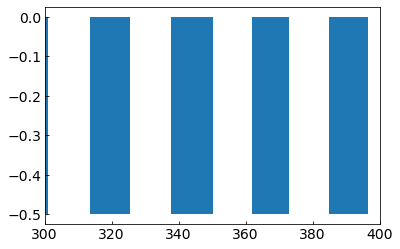

In [45]:
plt.fill_between(markers_x, markers[1:len(markers_x)+1] * -0.5, 0)
plt.xlim(300, 400)

In [38]:
markers = np.array([markers, markers]).T.flatten()

In [41]:
markers[1:len(markers_x)]

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.])